# Population, GDP and Internet adoption

This notebook expores all those subjects to answer the following questions: 

[add questions here]





We will simulate a data pipeline based on the following steps:

- extract : ingest data from various data sources.
- transform : clean and prepare each dataset for tra
- load :  merge the data sets together 
- visualise: create some meaningful graphical visualisation.

# Extract

We upload the data and the libraries required for the notebook. 

In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/countries-gdp-2012-to-2021/GDP.csv
/kaggle/input/population-dataset/World-population-by-countries-dataset.csv
/kaggle/input/internet-users/Final.csv


In [89]:
path = '/kaggle/input/population-dataset/World-population-by-countries-dataset.csv'
data_pop = pd.read_csv(path)
data_pop.shape

(266, 64)

## World population
We transform the datasets from a wide to long format, so that we can merge more easily the datasets together. We aim at having a country name and a country code; both uses the ISO standard. We aim at having a year and the population. 

In [90]:
data_pop.dtypes

Country Name     object
Country Code     object
1960            float64
1961            float64
1962            float64
                 ...   
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
Length: 64, dtype: object

In [91]:
data_pop.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,1.172174e+08,1.187633e+08,1.208717e+08,1.234910e+08,1.261315e+08,1.288372e+08,1.316853e+08,1.345256e+08,1.374350e+08,1.404490e+08,...,2.874902e+08,2.912969e+08,2.951160e+08,2.989277e+08,3.027560e+08,3.065980e+08,3.103591e+08,3.140425e+08,3.176734e+08,3.210893e+08
std,3.695745e+08,3.739180e+08,3.804316e+08,3.889142e+08,3.974401e+08,4.062000e+08,4.155171e+08,4.247722e+08,4.342805e+08,4.441772e+08,...,9.017511e+08,9.129343e+08,9.241050e+08,9.352101e+08,9.463321e+08,9.575052e+08,9.683483e+08,9.788967e+08,9.891628e+08,9.988295e+08
min,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,...,1.013600e+04,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04,1.087300e+04
25%,5.022802e+05,5.109642e+05,5.206540e+05,5.311622e+05,5.421252e+05,5.533362e+05,5.647475e+05,5.823645e+05,5.981078e+05,6.100030e+05,...,1.539939e+06,1.574621e+06,1.609909e+06,1.645868e+06,1.689616e+06,1.716772e+06,1.740174e+06,1.751950e+06,1.767996e+06,1.791783e+06
50%,3.718330e+06,3.826398e+06,3.929109e+06,4.015834e+06,4.124521e+06,4.242788e+06,4.326013e+06,4.387887e+06,4.474171e+06,4.550402e+06,...,9.824808e+06,9.948838e+06,1.001582e+07,1.022085e+07,1.036160e+07,1.040671e+07,1.045548e+07,1.047907e+07,1.052565e+07,1.054019e+07
75%,2.636053e+07,2.721235e+07,2.808607e+07,2.890669e+07,2.972333e+07,3.055227e+07,3.134845e+07,3.200449e+07,3.244145e+07,3.277149e+07,...,6.057984e+07,6.120753e+07,6.174243e+07,6.182699e+07,6.187352e+07,6.191725e+07,6.193141e+07,6.150589e+07,6.157091e+07,6.295547e+07
max,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.089255e+09,7.175500e+09,7.261847e+09,7.347679e+09,7.433651e+09,7.519371e+09,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09


In [92]:
len(data_pop['Country Code'].unique())

266

In [93]:
cols = [str(i) for i in range(1960,2022)]
pop_long = pd.melt(data_pop, id_vars=["Country Name", "Country Code"], value_vars=cols)
print(pop_long.shape)
pop_long.dtypes

(16492, 4)


Country Name     object
Country Code     object
variable         object
value           float64
dtype: object

In [94]:
pop_long.columns = ['Country Name', 'Country Code', 'Year', 'population']
print(pop_long.shape)
pop_long.dtypes

(16492, 4)


Country Name     object
Country Code     object
Year             object
population      float64
dtype: object

## GDP
We repeat a similar process for the GDP. Similar standards are used.

In [95]:
path = '/kaggle/input/countries-gdp-2012-to-2021/GDP.csv'
gdp  = pd.read_csv(path)
gdp.shape

(266, 64)

In [96]:
gdp.dtypes

Country Name     object
Country Code     object
1960            float64
1961            float64
1962            float64
                 ...   
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
Length: 64, dtype: object

In [97]:
gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,134.000000,136.000000,138.000000,138.000000,138.000000,149.000000,152.000000,155.000000,160.000000,160.000000,...,258.000000,259.000000,260.000000,258.000000,257.000000,257.000000,257.000000,255.000000,252.000000,245.000000
mean,473.490078,486.392600,510.248600,541.649901,587.373909,648.068814,703.235758,718.916647,735.345411,796.539042,...,16248.249264,16768.974417,17083.306427,15423.701141,15582.736498,16383.403010,17344.572407,17231.399427,15773.923985,16882.053955
std,612.439366,635.127847,666.405011,705.754944,772.265425,849.994333,921.818962,954.791908,982.957313,1060.025132,...,23882.158473,25383.007646,25945.938982,23375.375304,23586.086580,24397.646814,25978.513510,25791.905913,24065.495555,26113.837043
min,40.119192,26.318449,26.983496,28.434172,20.018579,16.577652,12.786964,12.900238,20.395642,20.682296,...,238.205949,241.547671,257.818552,289.359633,242.065671,243.135809,231.446476,216.972968,216.826741,221.477676
25%,107.452258,110.089913,114.582873,122.509292,123.574875,140.756742,145.396584,152.410537,149.457032,151.634207,...,1986.934959,2110.418190,2173.282618,2097.331179,2079.448266,2088.500117,2269.177012,2186.046581,2139.636129,2304.844567
50%,217.932654,197.938953,202.801243,210.677240,232.182537,251.239040,266.219488,252.252422,292.642193,293.802194,...,6454.612266,6755.073675,6904.579093,6192.562429,6079.088736,6436.791746,6912.110297,6837.717826,6034.203335,6621.574336
75%,476.295836,485.401860,538.891433,586.773416,639.414205,681.131112,768.852316,763.567965,760.566852,826.288906,...,19638.711935,19792.134135,20277.795912,18210.359455,18575.232030,19743.954910,20614.898860,19809.323135,18652.166725,18751.026510
max,3007.123445,3066.562869,3243.843078,3374.515171,3573.941185,4081.915955,4229.254573,4336.426587,4695.923390,5032.144743,...,165505.178100,185066.578100,195780.006900,170337.924400,174610.637000,173612.864600,194280.822100,199377.481800,182538.638300,234315.460500


In [98]:
len(gdp['Country Code'].unique())

266

In [99]:
cols = [str(i) for i in range(1960,2022)]
gdp_long = pd.melt(gdp, id_vars=["Country Name", "Country Code"], value_vars=cols)
print(gdp_long.shape)
gdp_long.dtypes

(16492, 4)


Country Name     object
Country Code     object
variable         object
value           float64
dtype: object

In [100]:
gdp_long.columns = ['Country Name', 'Country Code', 'Year', 'USD GDP']
print(gdp_long.shape)
gdp_long.dtypes

(16492, 4)


Country Name     object
Country Code     object
Year             object
USD GDP         float64
dtype: object

## Internet
This dataset is a bit simpler. Less transformation is required.

In [101]:
path = '/kaggle/input/internet-users/Final.csv'
internet = pd.read_csv(path)
internet.shape

(8867, 8)

In [102]:
internet.dtypes

Unnamed: 0                  int64
Entity                     object
Code                       object
Year                        int64
Cellular Subscription     float64
Internet Users(%)         float64
No. of Internet Users       int64
Broadband Subscription    float64
dtype: object

In [103]:
len(internet.Code.unique())

216

In [136]:
internet.describe()

,Unnamed: 0,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
count,8867.000000,8867.000000,8867.000000,8867.000000,8.867000e+03,8867.000000
mean,4433.000000,2000.151799,39.989614,17.043606,1.089138e+07,4.440695
std,2559.826752,11.812151,51.981410,26.883498,1.248841e+08,9.755705
min,0.000000,1980.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2216.500000,1990.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,4433.000000,2000.000000,5.501357,0.855662,1.004700e+04,0.000000
75%,6649.500000,2010.000000,82.231594,25.449939,8.664195e+05,2.007603
max,8866.000000,2020.000000,436.103027,100.000000,4.699886e+09,78.524361


It appears the number of countries to be smaller for the Internet dataset. Therefore, any merging of this datasets with the GDP and polution will reduce the number of countries by 50.  This confounding factor will limit the analysis. It is a bit disappointing, but it will be enough a first exploration. 

# Tranform and load
We merge the datasets based on the year and the ISO country code.

In [104]:
print(pop_long.dtypes)
print(gdp_long.dtypes)

Country Name     object
Country Code     object
Year             object
population      float64
dtype: object
Country Name     object
Country Code     object
Year             object
USD GDP         float64
dtype: object


In [105]:
data = pd.merge(pop_long, gdp_long, left_on=['Country Code','Year'], right_on = ['Country Code','Year'])
print(data.shape)
data.dtypes

(16492, 6)


Country Name_x     object
Country Code       object
Year               object
population        float64
Country Name_y     object
USD GDP           float64
dtype: object

In [106]:
cols = ['Country Name_x', 'Country Code', 'Year', 'population','USD GDP']
data = data.loc[:, cols]
print(data.shape)
data.dtypes

(16492, 5)


Country Name_x     object
Country Code       object
Year               object
population        float64
USD GDP           float64
dtype: object

In [107]:
data.columns = ['Country Name','Country Code', 'Year', 'Population', 'GDP']
print(data.shape)
data.dtypes

(16492, 5)


Country Name     object
Country Code     object
Year             object
Population      float64
GDP             float64
dtype: object

In [108]:
data.head()

,Country Name,Country Code,Year,Population,GDP
0,Aruba,ABW,1960,54208.0,NaN
1,Africa Eastern and Southern,AFE,1960,130836765.0,162.913035
2,Afghanistan,AFG,1960,8996967.0,62.369375
3,Africa Western and Central,AFW,1960,96396419.0,106.976475
4,Angola,AGO,1960,5454938.0,NaN


We apply the log normalisation on the data. The range is really large. It will allow us visualising in more details the distributions. However, any patterns through the years will appear as linear. It would be incorrect to interpret it as a linear growth, when it may be instead exponential. For that reasons, the non-normalise data may need to be used. 

The distribute appears to be guassian. However, it includes the population for each year. So, it should be only used as a tool to explore the data.

count    1.638700e+04
mean     2.131655e+08
std      7.006673e+08
min      2.833000e+03
25%      9.660195e+05
50%      6.749849e+06
75%      4.626525e+07
max      7.836631e+09
Name: Population, dtype: float64

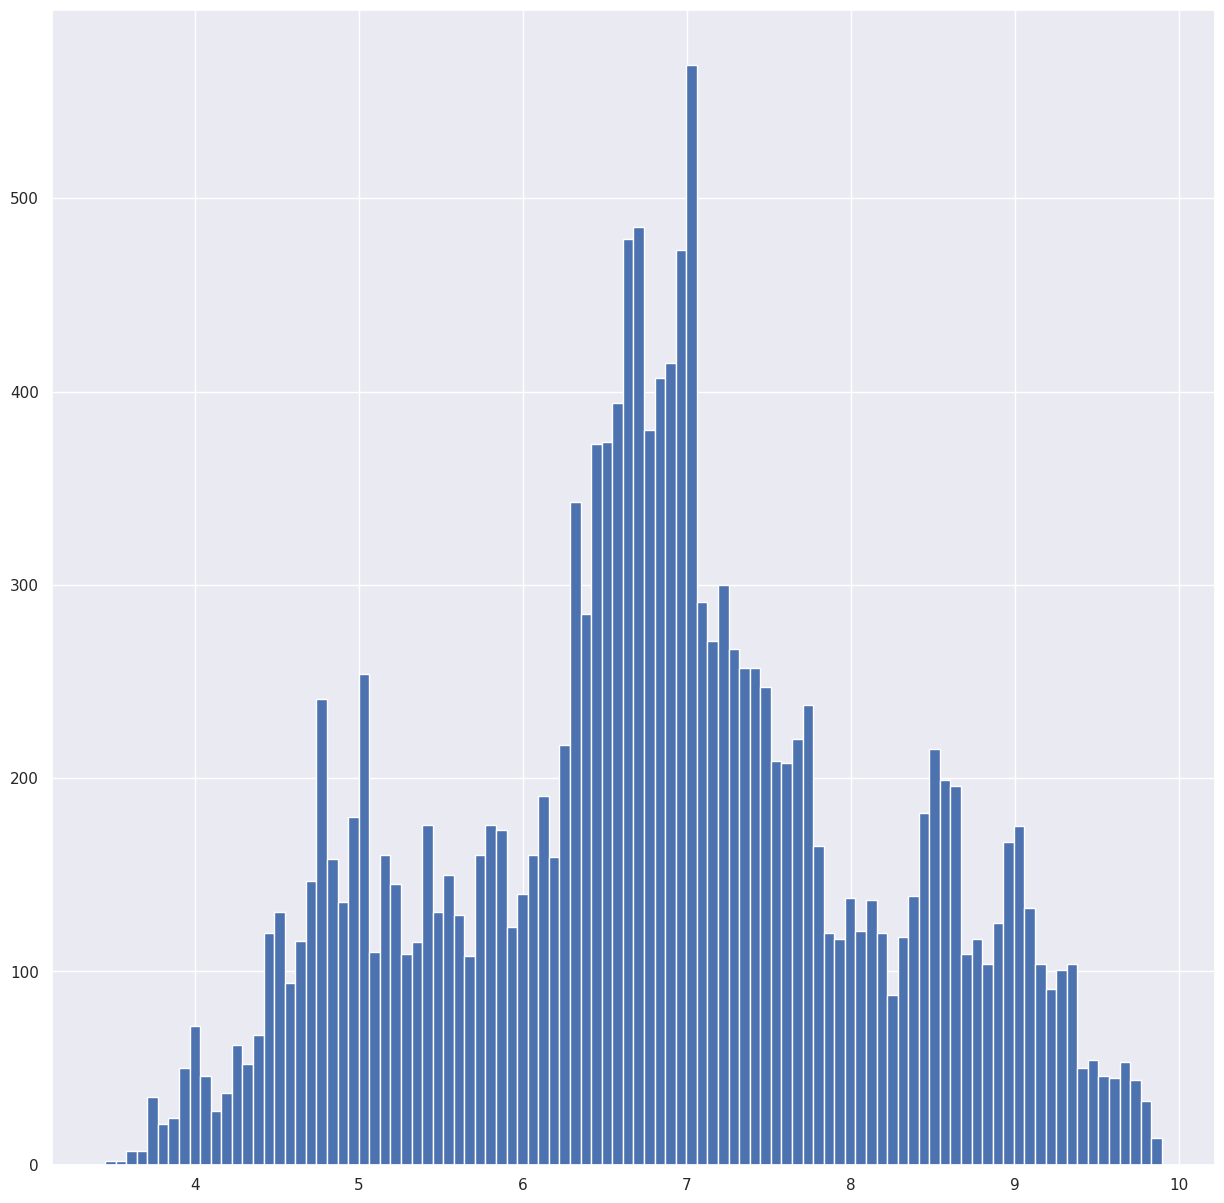

In [109]:
data['log_pop'] = np.log10(data.Population)
data.log_pop.hist(bins = 100)
data.Population.describe()

In [120]:
data['Year'] = pd.to_numeric(data.Year)
data_int = pd.merge(data, internet, left_on ='Year', right_on = 'Year', how = 'inner')
print(data_int.shape)
data_int.dtypes


(2358622, 13)


Country Name               object
Country Code               object
Year                        int64
Population                float64
GDP                       float64
log_pop                   float64
Unnamed: 0                  int64
Entity                     object
Code                       object
Cellular Subscription     float64
Internet Users(%)         float64
No. of Internet Users       int64
Broadband Subscription    float64
dtype: object

# Analysis
## Has the population increased since the 1960s?

We discover the overall population may have increased since the 1960s. A boxplot shows the non-parametric distribution of yearly population across the world tend to increase. We would need to complete some further investigation to explore further this trend.

In [121]:
data.dtypes

Country Name     object
Country Code     object
Year              int64
Population      float64
GDP             float64
log_pop         float64
dtype: object

In [122]:
data_pop['1960'].describe()


count    2.640000e+02
mean     1.172174e+08
std      3.695745e+08
min      2.833000e+03
25%      5.022802e+05
50%      3.718330e+06
75%      2.636053e+07
max      3.032156e+09
Name: 1960, dtype: float64

<Axes: xlabel='Year', ylabel='Population'>

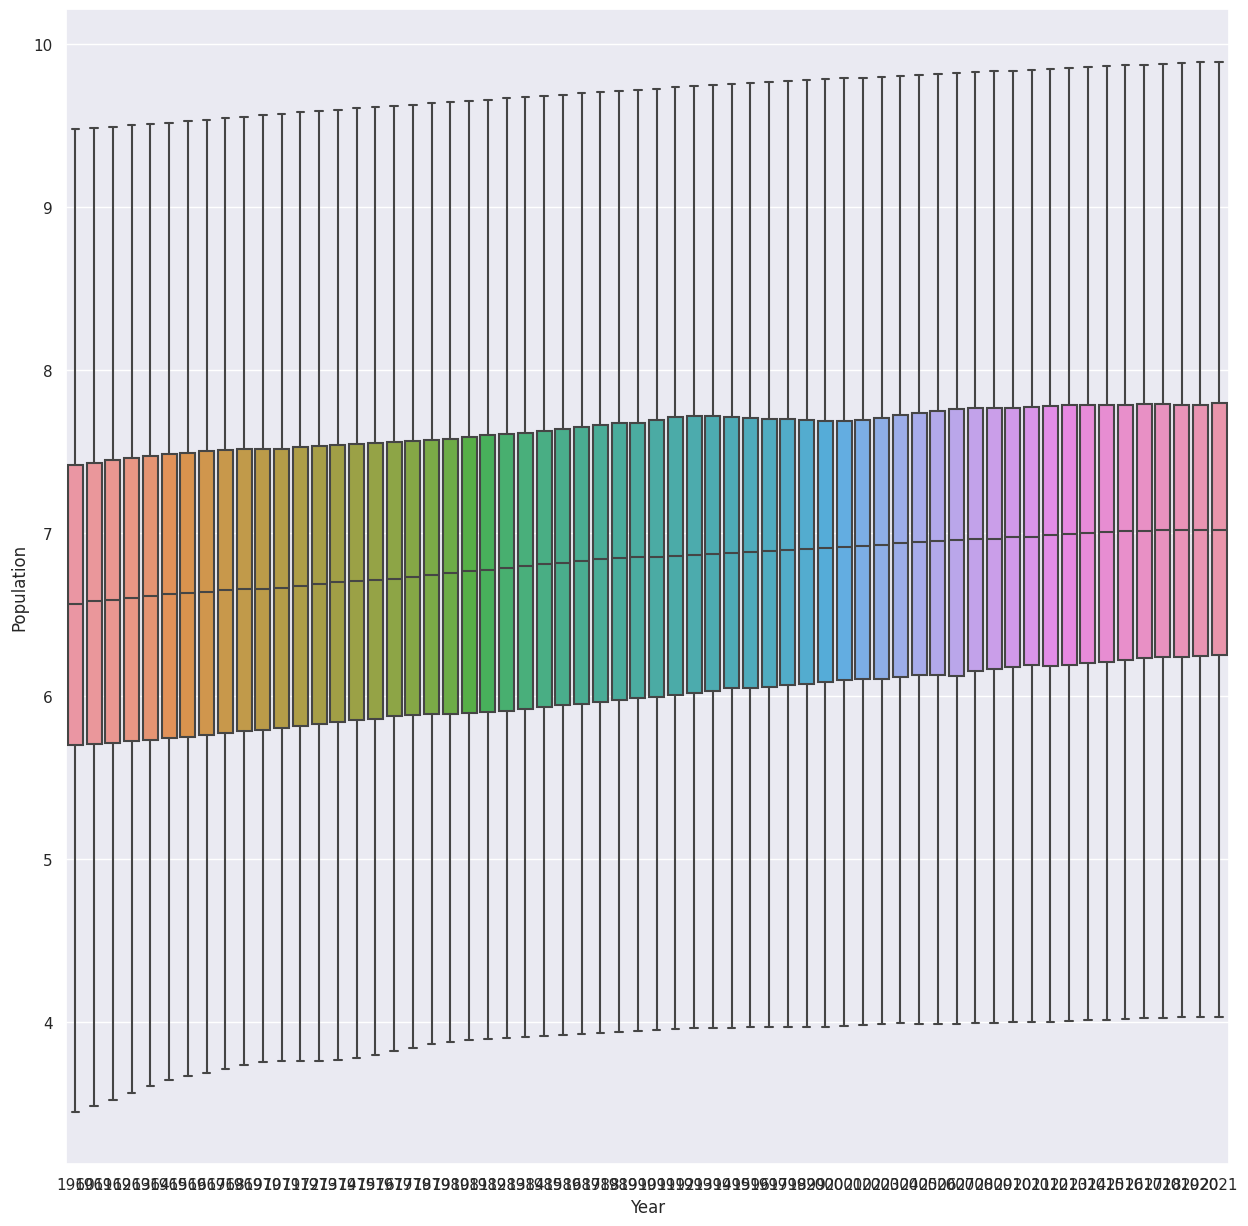

In [128]:
years = range(1960, 2022,1)
rows = data.Year.isin(years) 
cols = ['Year','Population']
data_graph = data.loc[rows, cols]
data_graph['Population'] = np.log10(data_graph.Population)

sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(x = data_graph['Year'], y = data_graph['Population'])


## To which extend, the GDP and population may have a relationship?

We produced a scatter plot to explore the possible relationship between both the GDP and poplution. It challenging to interpret a possible relationship.  A 3D scatter plot shows some level of complexity in the data. Some advanced regression or some clustering analysis may help identifying some relationships. 

In [129]:
data['log_gdp'] = np.log10(data.GDP)
data.log_gdp.describe()


count    13156.000000
mean         3.315185
std          0.752098
min          1.106767
25%          2.734065
50%          3.268659
75%          3.879667
max          5.369801
Name: log_gdp, dtype: float64

Text(0, 0.5, 'Population - log values ')

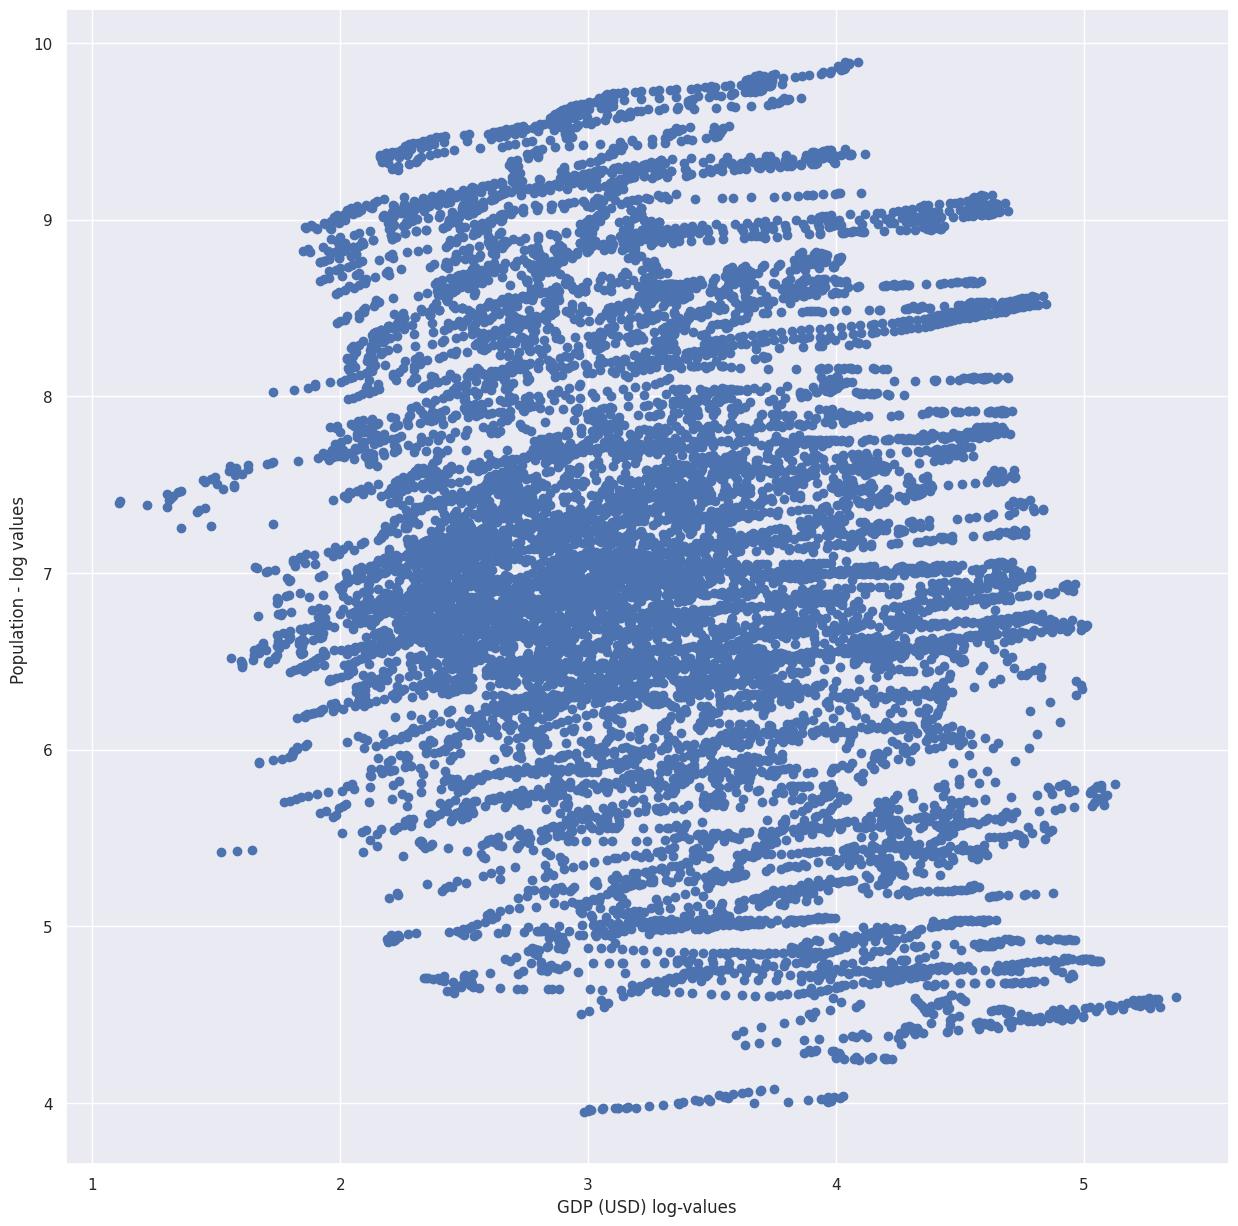

In [130]:
plt.scatter(data.log_gdp, data.log_pop)
plt.xlabel('GDP (USD) log-values')
plt.ylabel('Population - log values ')

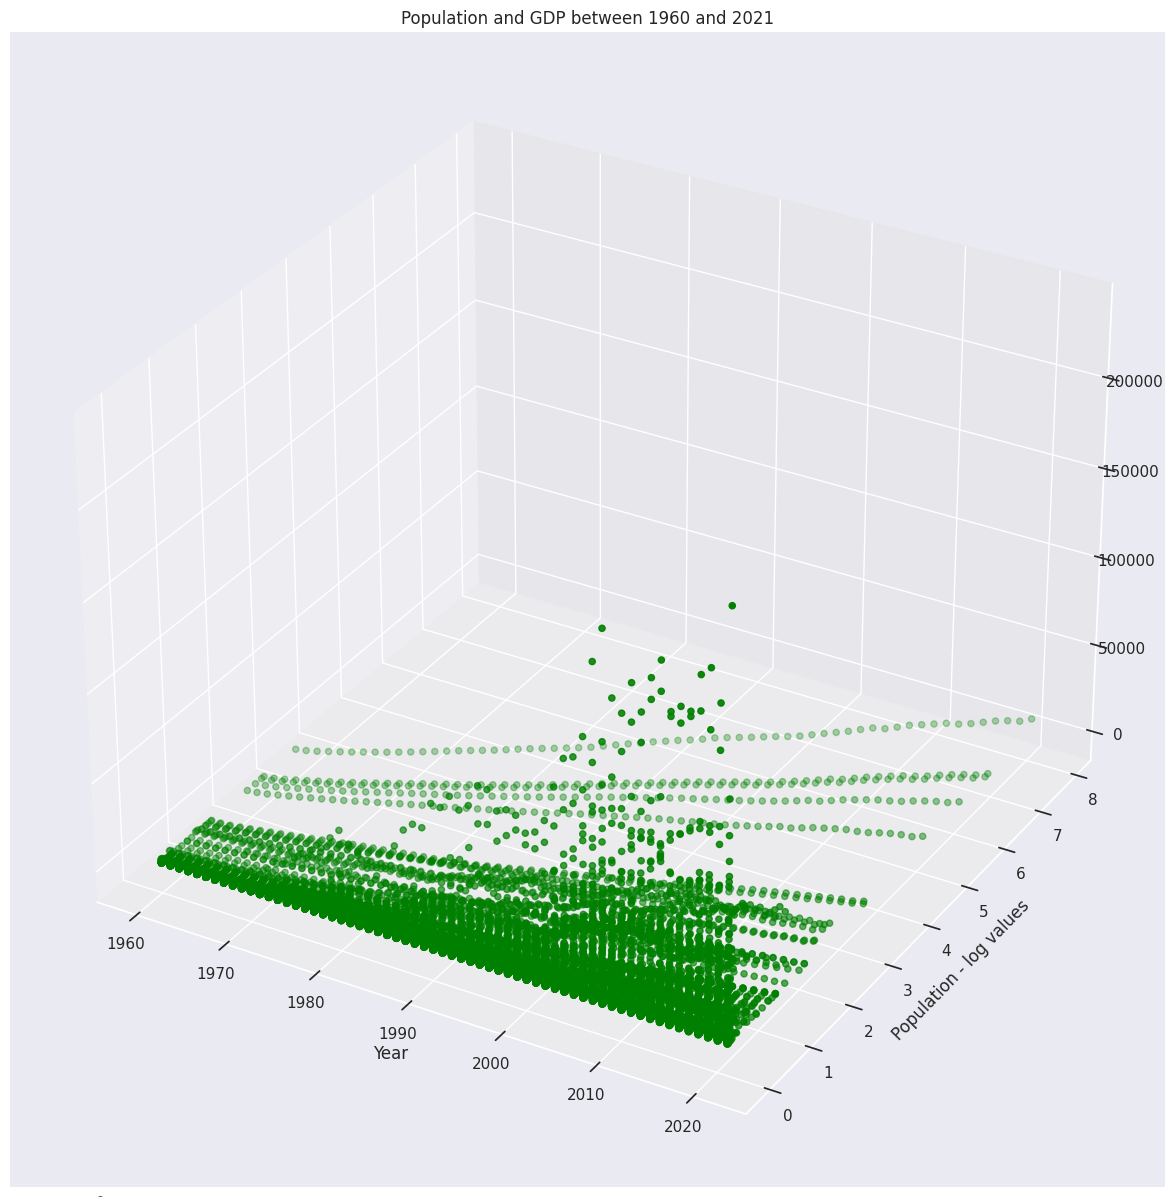

In [131]:



# Creating figure
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(data.Year, data.Population, data.GDP, color = "green")
plt.title("Population and GDP between 1960 and 2021")
plt.xlabel('Year')
plt.ylabel('Population - log values ')

 
# show plot
plt.show()

## How has the Internet usage increased through time?

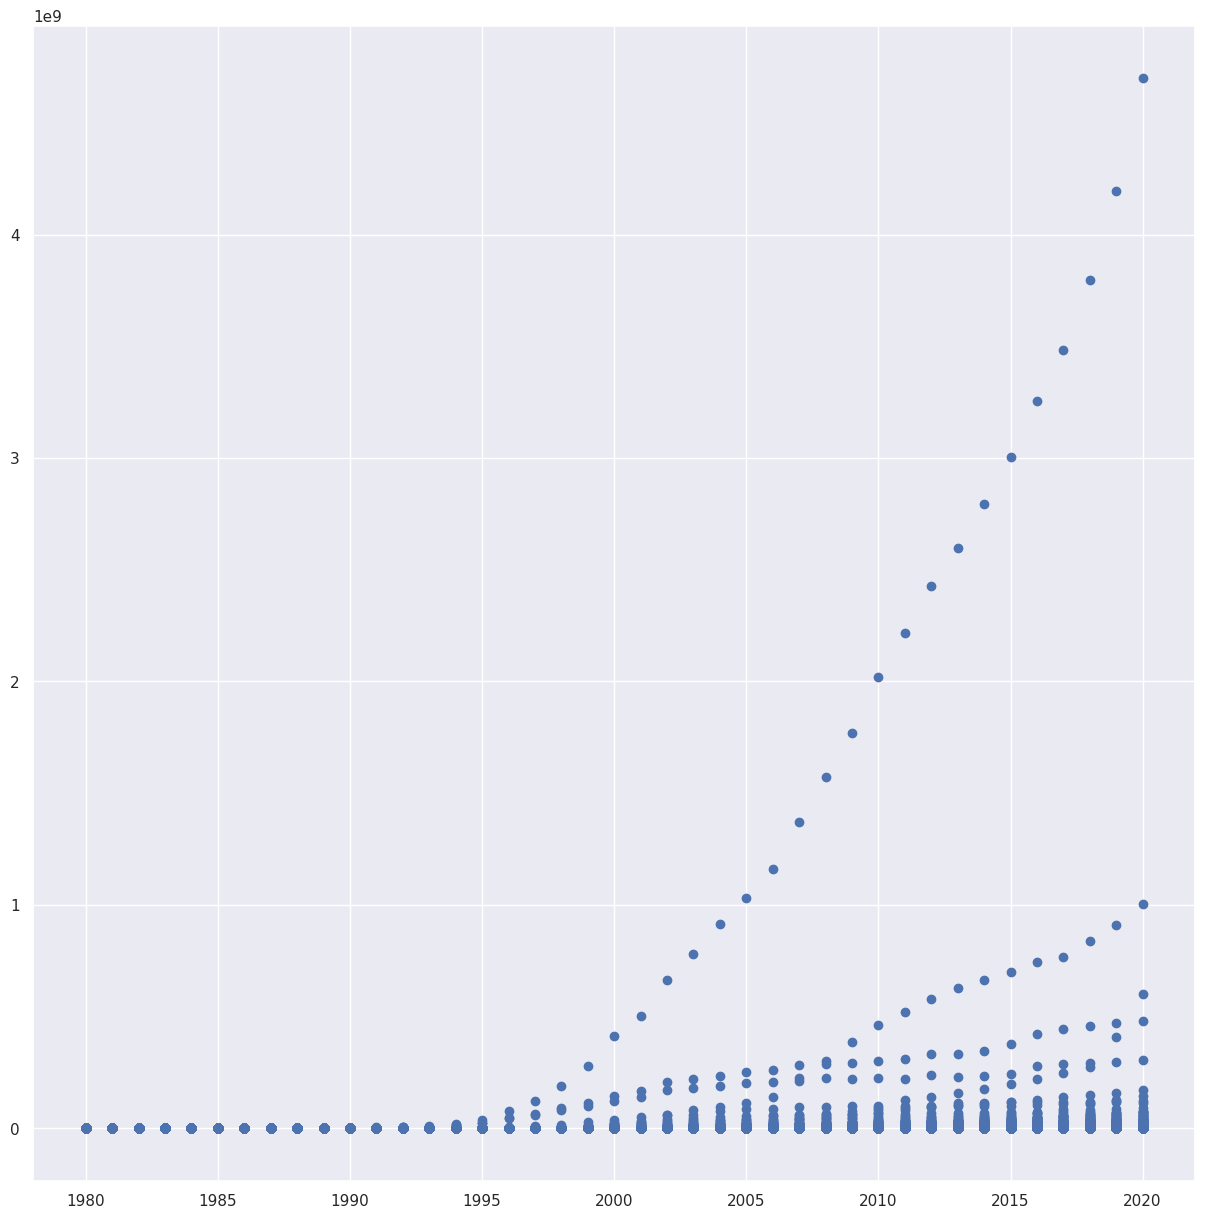

In [144]:
plt.scatter(internet.Year, internet['No. of Internet Users'])

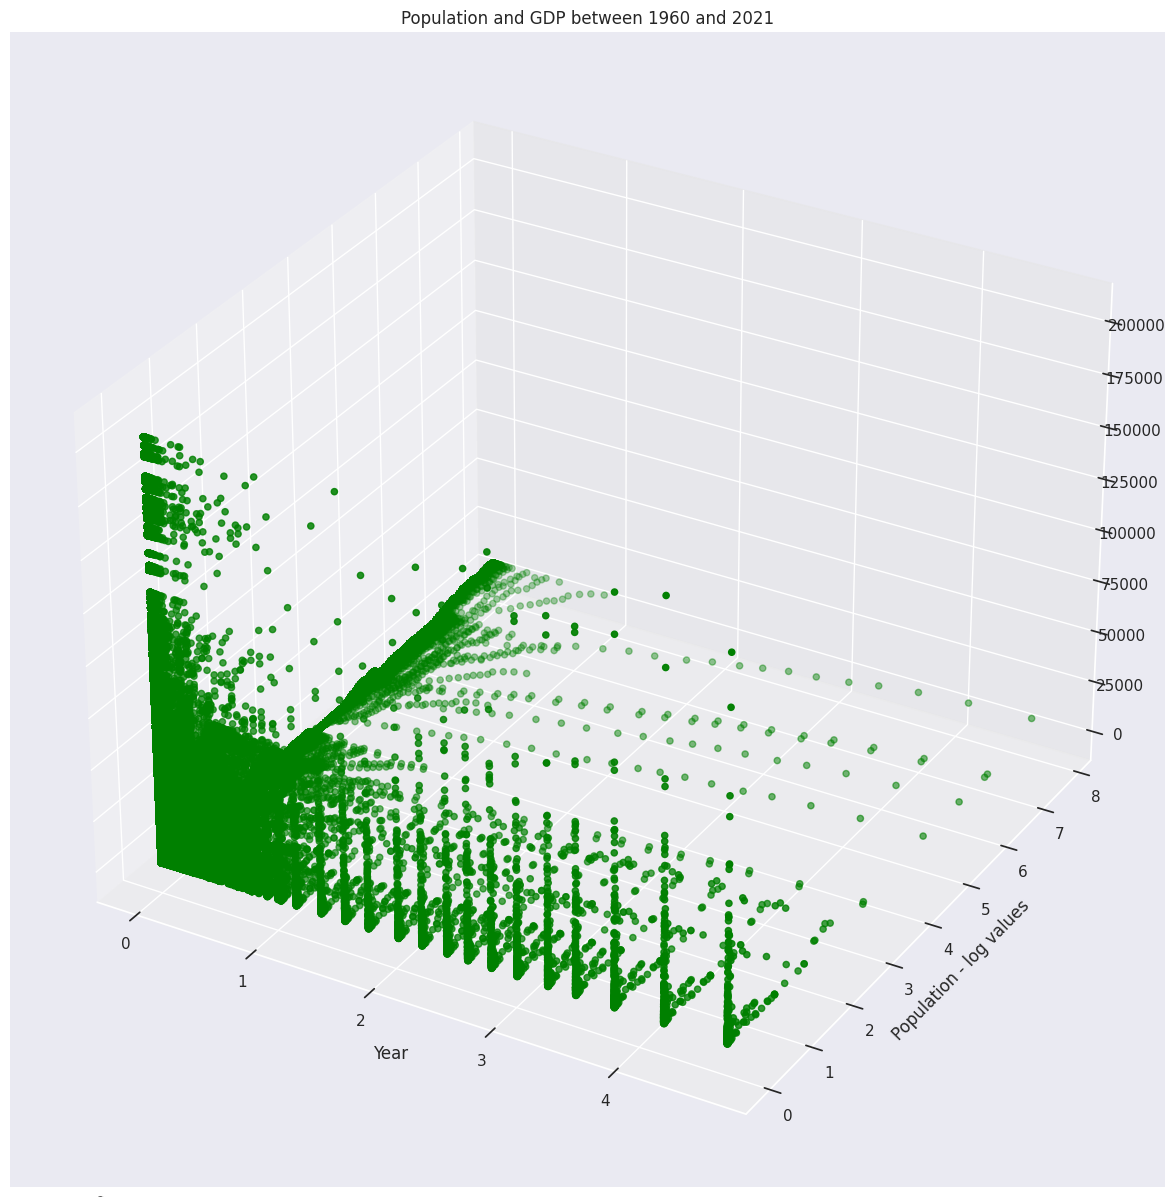

In [141]:
# Creating figure
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(data_int['No. of Internet Users'], data_int.Population, data_int.GDP, color = "green")
plt.title("Population and GDP between 1960 and 2021")
plt.xlabel('Year')
plt.ylabel('Population - log values ')

 
# show plot
plt.show()

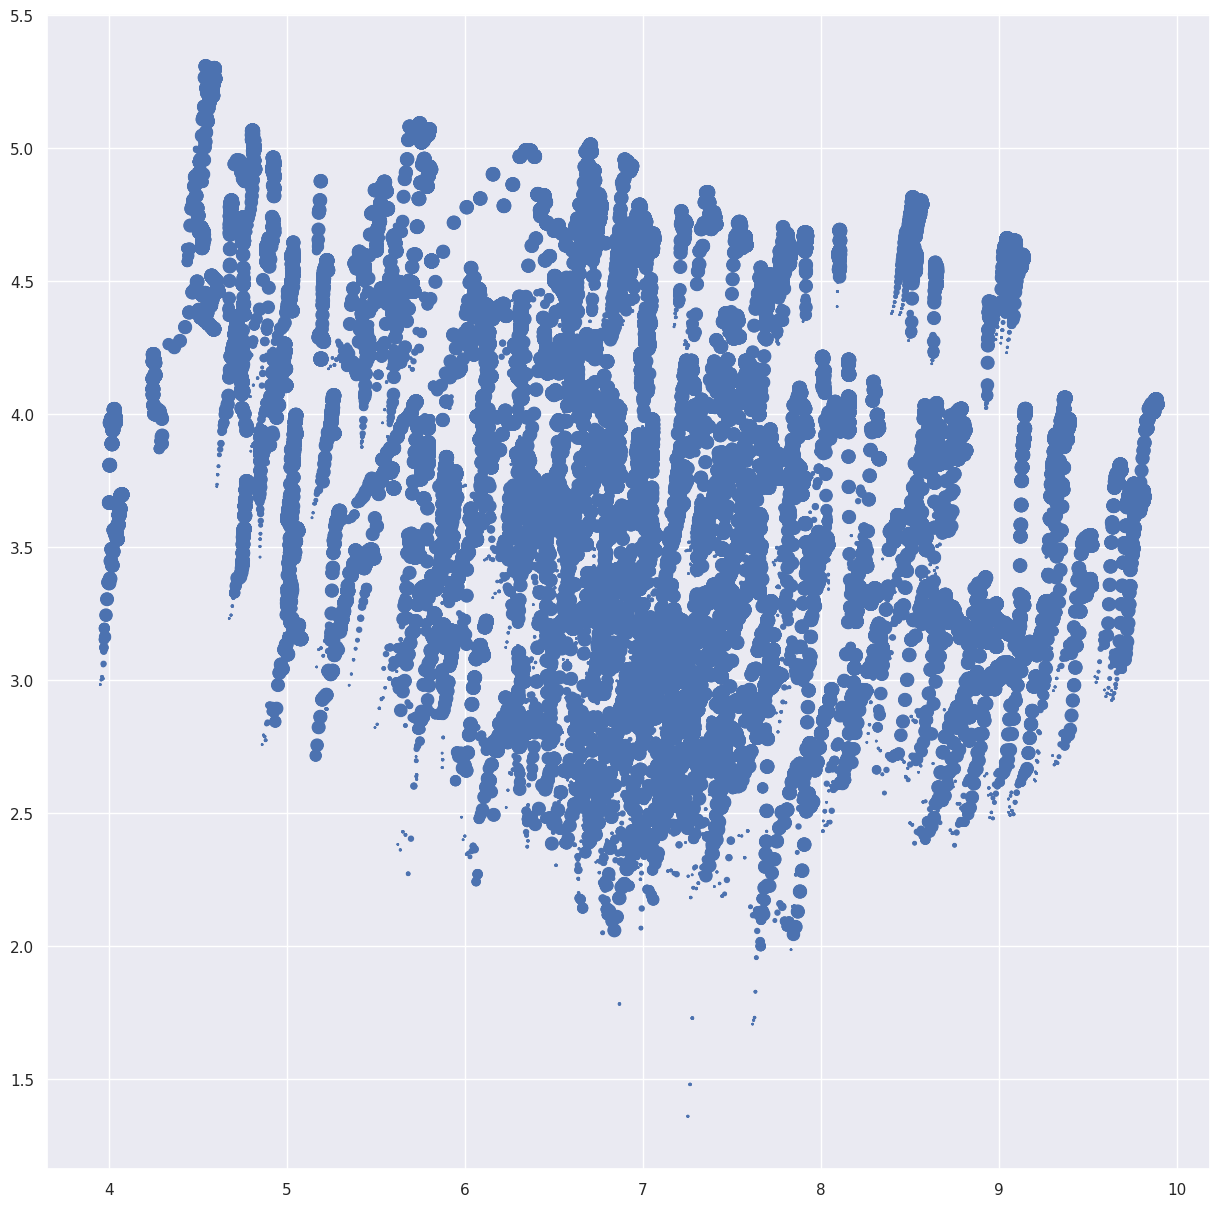

In [140]:
# create data
x = np.log10(data_int.Population)
y = np.log10(data_int.GDP)
z = data_int['Internet Users(%)']
 
# use the scatter function
plt.scatter(x, y, s=z, alpha=0.5)

# show the graph
plt.show()